In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn import linear_model
import string
import math
import gzip
import random

In [205]:
df_mod = pd.read_json('modcloth_final_data.json.gz', compression='gzip', lines=True)
print(len(df_mod))
df_mod.head()

82790


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [206]:
df_mod.dropna()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
7872,154411,34.0,15,5.0,ddd/f,42.0,38.0,new,42,5ft 2in,Cas525,just right,fit,550624,8.0,average,"Cute Dress, not on me, but still cute",This dress was just all kinds of bad on my sho...
7873,154411,27.0,8,5.0,b,37.0,34.0,new,34,5ft 2in,heatherlynnbennett,just right,fit,184506,7.0,average,"Love the dinos, hate the sleeves","Alas! I love the print of this dress and, base..."
8366,155981,30.0,8,5.0,b,41.0,34.0,new,36,5ft 4in,brinkbam,slightly long,fit,10043,7.0,average,holy moly,This is a gorgeous dress! I never spend this k...
8450,157334,26.0,8,5.0,d,38.0,32.0,new,34,5ft 10in,Stephanie,just right,fit,443239,8.5,average,Not for long torsos,I read a review that said this might not work ...
8473,159706,28.0,12,4.0,b,38.0,34.0,new,36,5ft 7in,dawn.koster,just right,small,490075,7.5,average,Size up!,The bodice in this dress is tiny! And I am by ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80851,800975,31.0,15,2.0,ddd/f,39.0,36.0,sale,39,5ft 6in,MaeBeth,just right,small,825897,8.0,wide,Cute print but poor quality and sized way small,"I returned this after barely trying it on, I b..."
80932,801763,36.0,15,3.0,d,42.0,38.0,outerwear,44,5ft 3in,Cara,just right,fit,845475,6.5,wide,Comfortable but not structured,I really like this blazer a lot. The fabric is...
80942,803464,30.0,8,1.0,c,40.0,36.0,outerwear,35,5ft 4in,snufflufagus,just right,fit,680585,8.0,wide,weird tail if you have a booty,"I have glutes. And I do mean glutes, not just ..."
82654,807252,30.0,20,5.0,b,39.0,42.0,outerwear,32,5ft 4in,jessicab1st,just right,fit,326547,7.5,wide,love this coat,"i got the 1x in mustard. beautiful material, t..."


In [207]:
set(df_mod['category'])

{'bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops', 'wedding'}

In [208]:
set(df_mod['length'])

{'just right',
 nan,
 'slightly long',
 'slightly short',
 'very long',
 'very short'}

In [209]:
set(df_mod['fit'])

{'fit', 'large', 'small'}

In [210]:
df_rent = pd.read_json('renttherunway_final_data.json.gz', compression='gzip', lines=True)
print(len(df_rent))
df_rent.head()

192544


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [211]:
def weight_clean(row):
    try:
        return int(row.split('l')[0])
    except:
        return np.nan
df_rent['weight'] = df_rent['weight'].apply(weight_clean)    

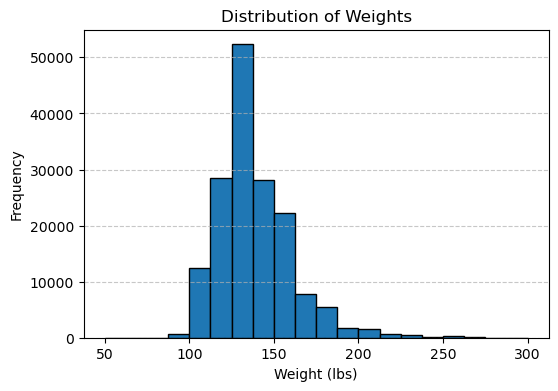

In [212]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['weight'], bins=20, edgecolor='black')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

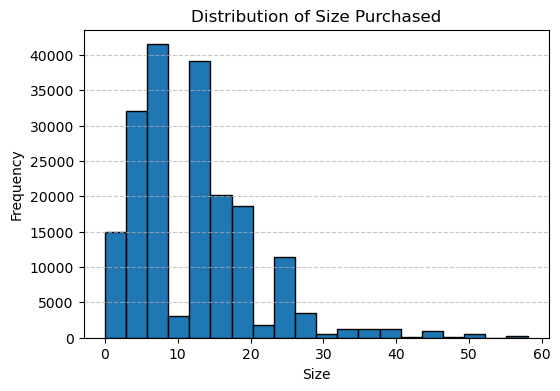

In [213]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['size'], bins=20, edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

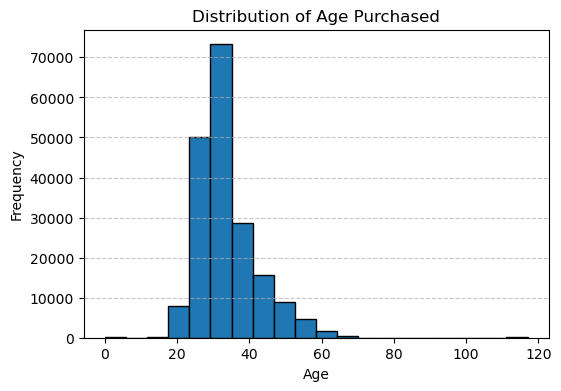

In [214]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

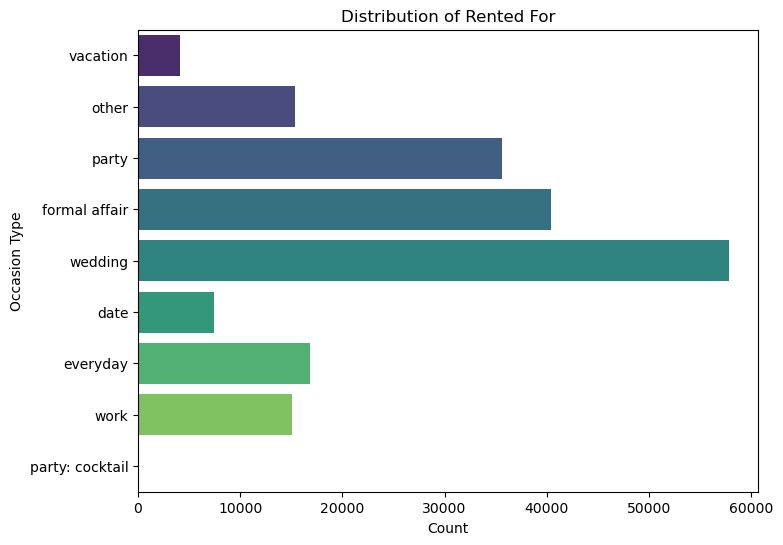

In [215]:
# countplot of number of companies in each employment type
plt.figure(figsize=(8, 6))
sns.countplot(y='rented for', data=df_rent, palette='viridis')
plt.title('Distribution of Rented For')
plt.xlabel('Count')
plt.ylabel('Occasion Type')
plt.show()

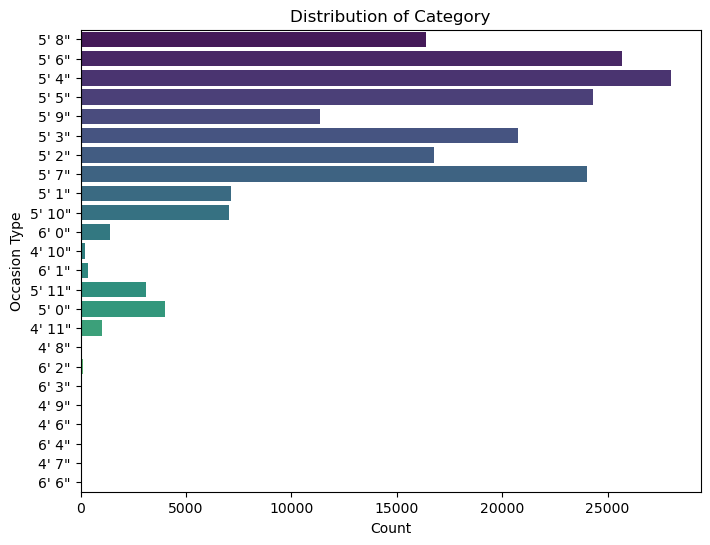

In [216]:
# countplot of number of companies in each employment type
plt.figure(figsize=(8, 6))
sns.countplot(y='height', data=df_rent, palette='viridis')
plt.title('Distribution of Category')
plt.xlabel('Count')
plt.ylabel('Occasion Type')
plt.show()

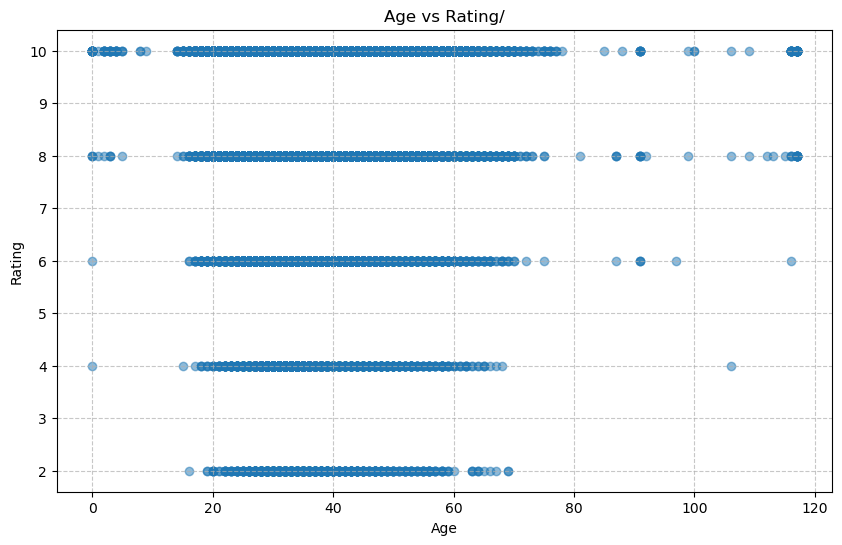

In [217]:
# scatter plot of average company rating vs salary_avg_estimate_per_year
plt.figure(figsize=(10, 6))
plt.scatter(df_rent['age'], df_rent['rating'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating/')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [218]:
def height_to_meters(height):
    if pd.isna(height):
        return np.nan  # Handle NaN values
    import re
    match = re.match(r"(\d+)' (\d+)\"", height)  # Match feet and inches
    if not match:
        return np.nan  # Return NaN for invalid formats
    feet = int(match.group(1))
    inches = int(match.group(2))
    total_inches = feet * 12 + inches
    meters = total_inches * 0.0254  # Convert inches to meters
    return meters

# Apply the function to the column
df_rent['height_meters'] = df_rent['height'].apply(height_to_meters)


/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/3991924618.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['body type'] = selected_data['body type'].map(body_type_mapping)
/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/3991924618.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['rented for'] = selected_data['rented for'].map(category_mapping)


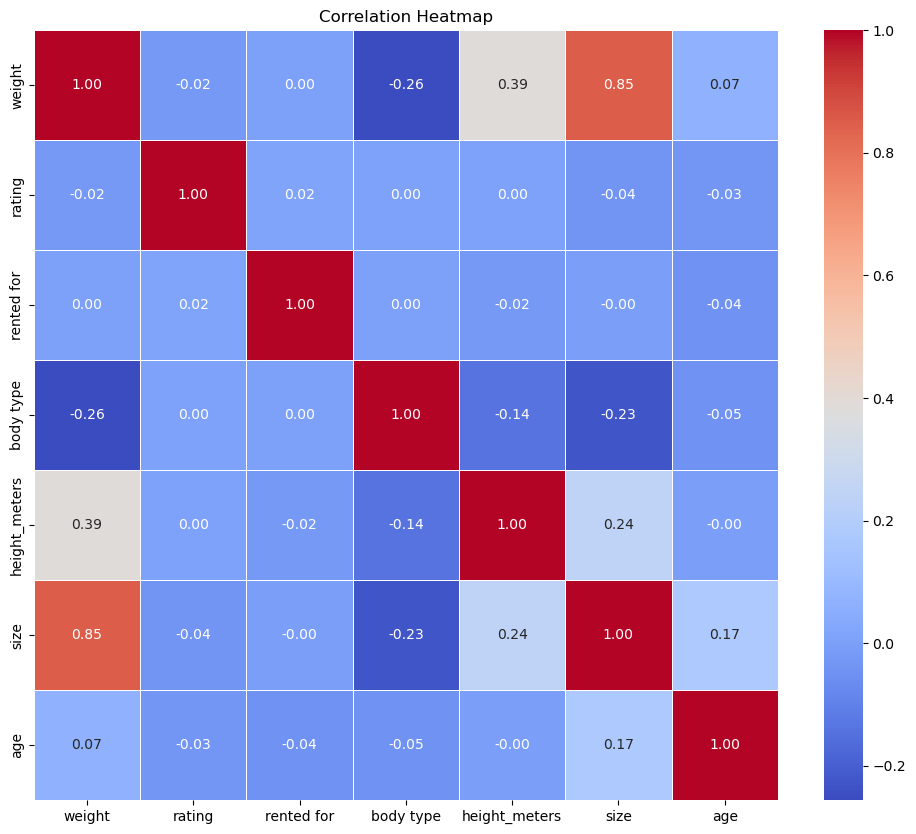

In [219]:
selected_columns = ['weight',
                    'rating', 'rented for','body type',       
'height_meters',      
'size',       
'age',]

selected_data = df_rent[selected_columns]

category_mapping = {
    'date': 1,
    'everyday': 2,
    'formal affair': 3,
    'party': 4,
    'party: cocktail': 5,
    'vacation': 6,
    'wedding': 7,
    'work': 8,
    'other': 9,
    None: 0  # NaN or missing values
}

body_type_mapping = {
    'apple': 1,
    'athletic': 2,
    'full bust': 3,
    'hourglass': 4,
    'pear': 5,
    'petite': 6,
    'straight & narrow': 7,
    None: 0  # Handling NaN or missing values
}

# Map the values
selected_data['body type'] = selected_data['body type'].map(body_type_mapping)

# Map the values
selected_data['rented for'] = selected_data['rented for'].map(category_mapping)



# dropping missing values if there are any in salary_range 
selected_data = selected_data.dropna()

# correlation matrix
correlation_matrix = selected_data.corr()

# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [220]:
df_rent.describe()

,user_id,item_id,weight,rating,size,age,height_meters
count,192544.000000,1.925440e+05,162562.000000,192462.000000,192544.000000,191584.000000,191867.000000
mean,499494.100149,1.045684e+06,137.391709,9.092371,12.245175,33.871017,1.658890
std,289059.719328,8.053148e+05,21.899967,1.430044,8.494877,8.058083,0.067652
min,9.000000,1.233730e+05,50.000000,2.000000,0.000000,0.000000,1.371600
25%,250654.250000,1.950760e+05,123.000000,8.000000,8.000000,29.000000,1.600200
50%,499419.000000,9.483960e+05,135.000000,10.000000,12.000000,32.000000,1.651000
75%,750974.000000,1.678888e+06,148.000000,10.000000,16.000000,37.000000,1.701800
max,999997.000000,2.966087e+06,300.000000,10.000000,58.000000,117.000000,1.981200


In [221]:
rating_mapping = {
    2 : 1,
    4:2,
    6:3,
    8:4,
    10:5   
}
selected_data['rating'] = selected_data['rating'].map(rating_mapping)


/Users/josephguzman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


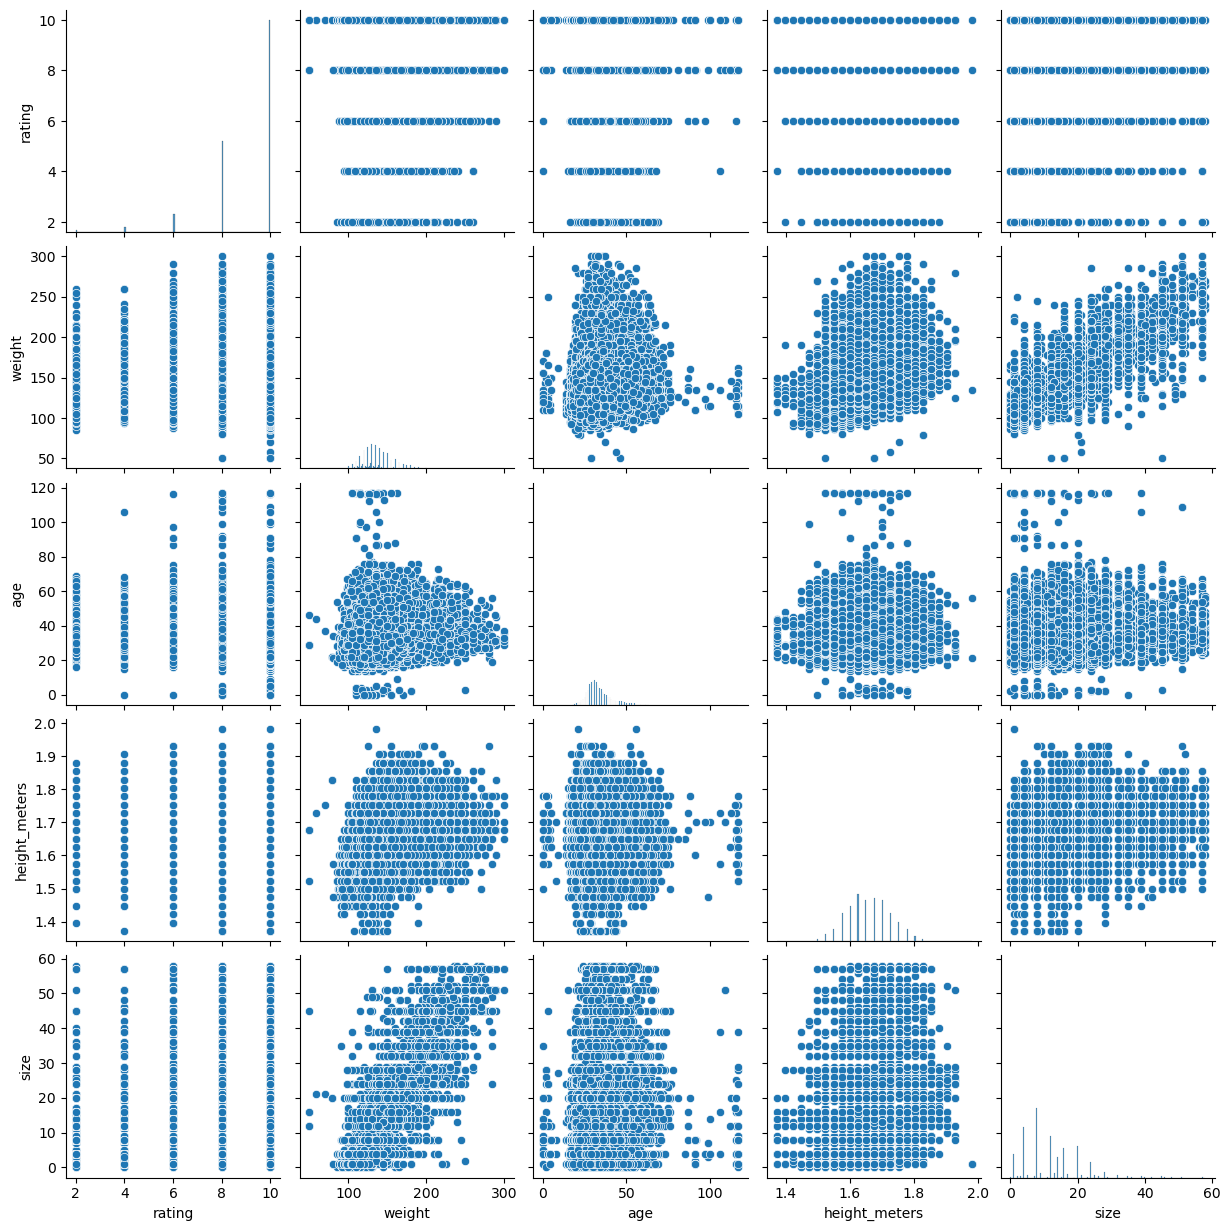

In [222]:
sns.pairplot(df_rent, vars=['rating', 'weight', 'age', 'height_meters', 'size'])


In [223]:
mean = df_rent['age'].mean()
std = df_rent['age'].std()
def z_score(row):
    a = row - mean
    return a / std
    

In [224]:
from scipy.stats import zscore

# Set threshold
# threshold = 3



df_rent['age'] = pd.to_numeric(df_rent['age'], errors='coerce')
df_rent['z_age'] = df_rent['age'].apply(z_score)

In [225]:
threshold = 3

# Keep rows within the threshold
df_rent_filtered = df_rent[df_rent['z_age'].abs() < threshold]

df_rent_filtered


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_meters,z_age
0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",1.7272,-0.728587
1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",1.6764,0.264205
3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",1.6510,0.016007
4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",1.7526,-0.852686
5,fit,734848,32b,364092,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016",1.7272,1.381096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",1.7526,1.008799
192540,fit,118398,32c,682043,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",1.5494,-0.604488
192541,fit,47002,36a,683251,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",1.7272,-0.356290
192542,fit,961120,36c,126335,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",1.6764,-0.356290


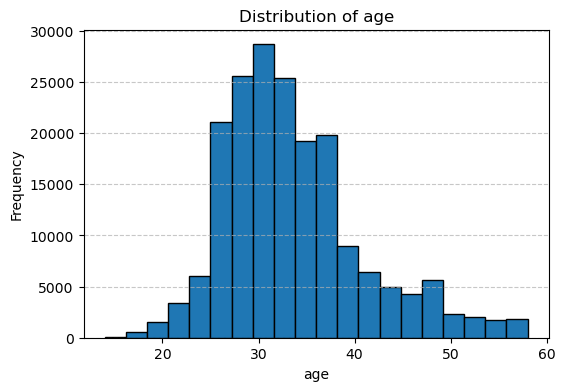

In [226]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent_filtered['age'], bins=20, edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [227]:
# sns.pairplot(df_rent, vars=['rating', 'weight', 'age', 'height_meters', 'size'])


mean = df_rent['weight'].mean()
std = df_rent['weight'].std()
def z_score(row):
    a = row - mean
    return a / std

df_rent_filtered['weight'] = pd.to_numeric(df_rent_filtered['weight'], errors='coerce')
df_rent_filtered['z_weight'] = df_rent_filtered['weight'].apply(z_score)

/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/984218978.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered['weight'] = pd.to_numeric(df_rent_filtered['weight'], errors='coerce')
/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/984218978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered['z_weight'] = df_rent_filtered['weight'].apply(z_score)


In [228]:
# Keep rows within the threshold
df_rent_filtered = df_rent_filtered[df_rent_filtered['z_weight'].abs() < threshold]

df_rent_filtered


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_meters,z_age,z_weight
0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",1.7272,-0.728587,-0.017886
1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",1.6764,0.264205,-0.246197
3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",1.6510,0.016007,-0.109211
4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",1.7526,-0.852686,0.347411
5,fit,734848,32b,364092,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016",1.7272,1.381096,0.027776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",1.7526,1.008799,0.119100
192540,fit,118398,32c,682043,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",1.5494,-0.604488,-1.707387
192541,fit,47002,36a,683251,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",1.7272,-0.356290,-0.109211
192542,fit,961120,36c,126335,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",1.6764,-0.356290,1.260654


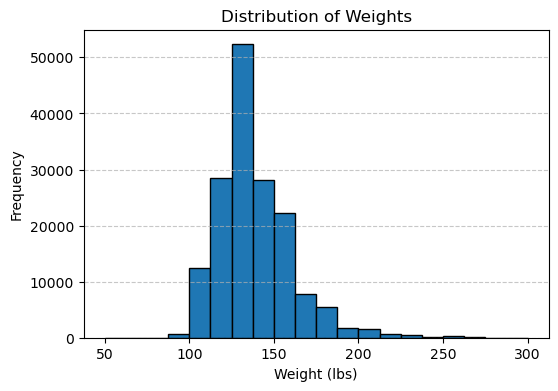

In [229]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent['weight'], bins=20, edgecolor='black')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

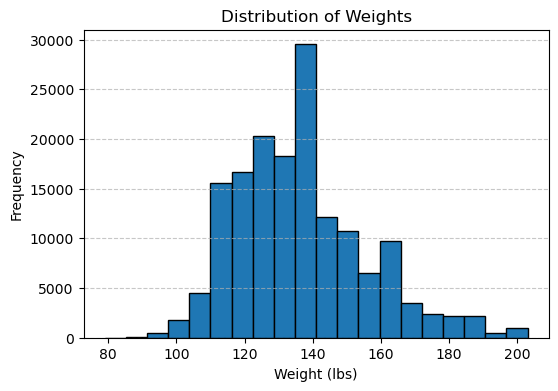

In [230]:
# plotting histogram of companies and the years they were founded
plt.figure(figsize=(6, 4))
plt.hist(df_rent_filtered['weight'], bins=20, edgecolor='black')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/Users/josephguzman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


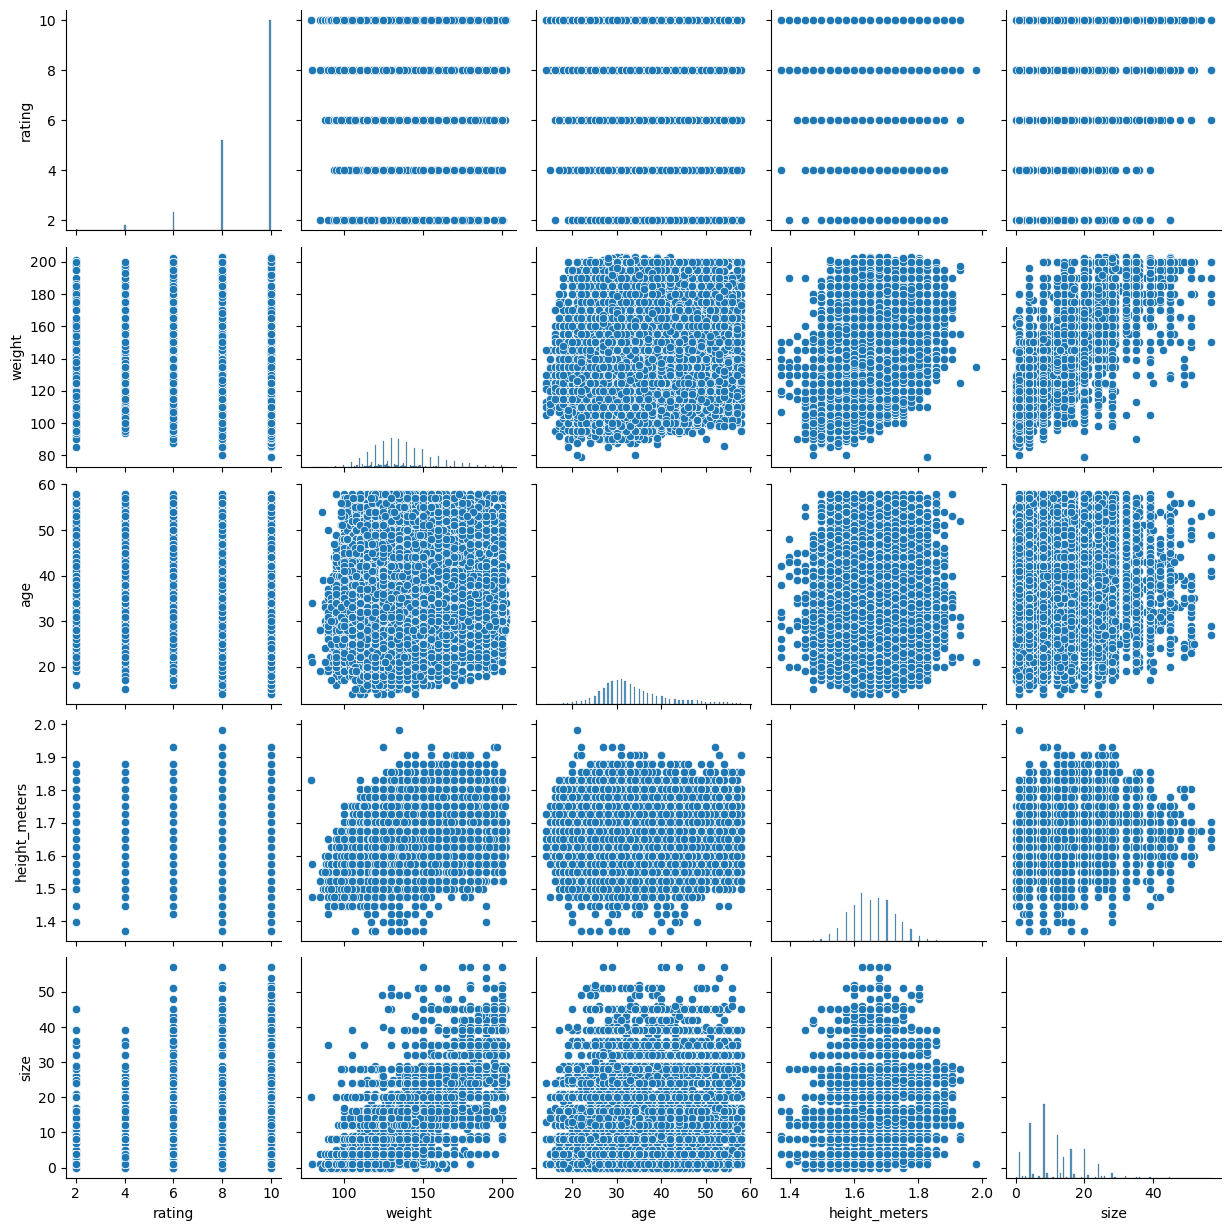

In [231]:
sns.pairplot(df_rent_filtered, vars=['rating', 'weight', 'age', 'height_meters', 'size'])


In [232]:


category_mapping = {
    'date': 1,
    'everyday': 2,
    'formal affair': 3,
    'party': 4,
    'party: cocktail': 5,
    'vacation': 6,
    'wedding': 7,
    'work': 8,
    'other': 9,
    None: 0  # NaN or missing values
}

body_type_mapping = {
    'apple': 1,
    'athletic': 2,
    'full bust': 3,
    'hourglass': 4,
    'pear': 5,
    'petite': 6,
    'straight & narrow': 7,
    None: 0  # Handling NaN or missing values
}

# Map the values
df_rent_filtered['body type'] = df_rent_filtered['body type'].map(body_type_mapping)

# Map the values
df_rent_filtered['rented for'] = df_rent_filtered['rented for'].map(category_mapping)




/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/1981742020.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered['body type'] = df_rent_filtered['body type'].map(body_type_mapping)
/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/1981742020.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered['rented for'] = df_rent_filtered['rented for'].map(category_mapping)


In [233]:
df_rent_filtered.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date', 'height_meters', 'z_age',
       'z_weight'],
      dtype='object')

In [234]:
def height_to_inches(height):
    if pd.isna(height):
        return np.nan  # Handle NaN values
    import re
    match = re.match(r"(\d+)' (\d+)\"", height)  # Match feet and inches
    if not match:
        return np.nan  # Return NaN for invalid formats
    feet = int(match.group(1))
    inches = int(match.group(2))
    total_inches = feet * 12 + inches
    return total_inches 

# Apply the function to the column
df_rent_filtered['height_inches'] = df_rent_filtered['height'].apply(height_to_inches)

/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/1460171666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered['height_inches'] = df_rent_filtered['height'].apply(height_to_inches)


In [235]:
#imputating missing values

df_rent_filtered["bust size"] = df_rent_filtered["bust size"].fillna("Unknown")
df_rent_filtered["weight"] = df_rent_filtered["weight"].fillna(df_rent_filtered["weight"].median())
df_rent_filtered["rented for"] = df_rent_filtered["rented for"].fillna("other")
df_rent_filtered["body type"] = df_rent_filtered["body type"].fillna(df_rent_filtered["body type"].mode()[0])
df_rent_filtered["rating"] = df_rent_filtered["rating"].fillna(df_rent_filtered["rating"].mode()[0])
df_rent_filtered["age"] = df_rent_filtered["age"].fillna(df_rent["age"].median())
df_rent_filtered["height_inches"] = df_rent_filtered["height_inches"].fillna(df_rent_filtered["height_inches"].median())

/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/94437039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered["bust size"] = df_rent_filtered["bust size"].fillna("Unknown")
/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/94437039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_filtered["weight"] = df_rent_filtered["weight"].fillna(df_rent_filtered["weight"].median())
/var/folders/ff/q2zj5x0j7hn_28kmlfc158t00000gn/T/ipykernel_35791/94437039.py:5: 

In [236]:
df_rent_filtered = df_rent_filtered.drop(columns = ['z_age','z_weight', 'height_meters'])

In [237]:
body_type_mapping = {
    2.0: 1.0,
    4.0: 2.0,    
    6.0: 3.0,    
    8.0: 4.0,    
    10.0: 5.0}

# Map the values
df_rent_filtered['rating'] = df_rent_filtered['rating'].map(body_type_mapping)

In [238]:
df_rent_filtered

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_inches
0,fit,420272,34d,2260466,137.0,5.0,6.0,An adorable romper! Belt and zipper were a lit...,4.0,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",68.0
1,fit,273551,34b,153475,132.0,5.0,9.0,I rented this dress for a photo shoot. The the...,7.0,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",66.0
3,fit,909926,34c,126335,135.0,4.0,3.0,I rented this for my company's black tie award...,5.0,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",65.0
4,fit,151944,34b,616682,145.0,5.0,7.0,I have always been petite in my upper body and...,2.0,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",69.0
5,fit,734848,32b,364092,138.0,4.0,1.0,Didn't actually wear it. It fit perfectly. The...,2.0,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016",68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140.0,5.0,8.0,Fit like a glove!,4.0,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",69.0
192540,fit,118398,32c,682043,100.0,5.0,8.0,The pattern contrast on this dress is really s...,6.0,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",61.0
192541,fit,47002,36a,683251,135.0,3.0,2.0,"Like the other DVF wraps, the fit on this is f...",7.0,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",68.0
192542,fit,961120,36c,126335,165.0,5.0,7.0,This dress was PERFECTION. it looked incredib...,5.0,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",66.0


In [239]:
fit_type_mapping = {
    'fit': 1,
    'small': 2,
    'large': 3 }
df_rent_filtered['fit'] = df_rent_filtered['fit'].map(fit_type_mapping)


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_inches
0,1,420272,34d,2260466,137.0,5.0,6.0,An adorable romper! Belt and zipper were a lit...,4.0,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",68.0
1,1,273551,34b,153475,132.0,5.0,9.0,I rented this dress for a photo shoot. The the...,7.0,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",66.0
3,1,909926,34c,126335,135.0,4.0,3.0,I rented this for my company's black tie award...,5.0,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",65.0
4,1,151944,34b,616682,145.0,5.0,7.0,I have always been petite in my upper body and...,2.0,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",69.0
5,1,734848,32b,364092,138.0,4.0,1.0,Didn't actually wear it. It fit perfectly. The...,2.0,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016",68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,1,66386,34dd,2252812,140.0,5.0,8.0,Fit like a glove!,4.0,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",69.0
192540,1,118398,32c,682043,100.0,5.0,8.0,The pattern contrast on this dress is really s...,6.0,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",61.0
192541,1,47002,36a,683251,135.0,3.0,2.0,"Like the other DVF wraps, the fit on this is f...",7.0,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",68.0
192542,1,961120,36c,126335,165.0,5.0,7.0,This dress was PERFECTION. it looked incredib...,5.0,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",66.0


In [245]:
df_rent_filtered

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_inches
0,1,420272,34d,2260466,137.0,5.0,6.0,An adorable romper! Belt and zipper were a lit...,4.0,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",68.0
1,1,273551,34b,153475,132.0,5.0,9.0,I rented this dress for a photo shoot. The the...,7.0,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",66.0
3,1,909926,34c,126335,135.0,4.0,3.0,I rented this for my company's black tie award...,5.0,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",65.0
4,1,151944,34b,616682,145.0,5.0,7.0,I have always been petite in my upper body and...,2.0,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",69.0
5,1,734848,32b,364092,138.0,4.0,1.0,Didn't actually wear it. It fit perfectly. The...,2.0,Traditional with a touch a sass,dress,"5' 8""",8,45.0,"April 30, 2016",68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,1,66386,34dd,2252812,140.0,5.0,8.0,Fit like a glove!,4.0,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016",69.0
192540,1,118398,32c,682043,100.0,5.0,8.0,The pattern contrast on this dress is really s...,6.0,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016",61.0
192541,1,47002,36a,683251,135.0,3.0,2.0,"Like the other DVF wraps, the fit on this is f...",7.0,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016",68.0
192542,1,961120,36c,126335,165.0,5.0,7.0,This dress was PERFECTION. it looked incredib...,5.0,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015",66.0


In [240]:
df_X = pd.get_dummies(df_rent_filtered, columns = ["category"])
df_X.drop(["rented for", "rating", "height", "review_date", "item_id", "user_id", "bust size", "review_text", "review_summary"],
          axis=1, inplace=True)
df_X.head()

,fit,weight,body type,size,age,height_inches,category_ballgown,category_blazer,category_blouse,category_blouson,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
0,1,137.0,4.0,14,28.0,68.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,132.0,7.0,12,36.0,66.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,135.0,5.0,8,34.0,65.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,145.0,2.0,12,27.0,69.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1,138.0,2.0,8,45.0,68.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [241]:
X = df_X
y = df_rent_filtered["rating"]

In [242]:
# 70-15-15 train-valid-test split
Ntrain = int(len(df_rent) *.7)
Ntest = int(len(df_rent)-(len(df_rent) -Ntrain)/2)

Xtrain = X[:Ntrain]
ytrain = y[:Ntrain]
Xvalid = X[Ntrain: Ntest].reset_index(drop = True)
yvalid = y[Ntrain: Ntest].reset_index(drop = True)
Xtest = X[Ntest:].reset_index(drop = True)
ytest = y[Ntest:].reset_index(drop = True)

In [243]:
df_X.shape

(158016, 74)

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn import linear_model
import string
import math
import gzip
import random

model = linear_model.LogisticRegression(C=0.1, max_iter = 200)
model.fit(Xtrain, ytrain)

/Users/josephguzman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=200)

In [251]:
ypred = model.predict(Xvalid)

In [309]:
set(ypred
)

{4.0, 5.0}

In [252]:
yvalid =  yvalid.reset_index(drop = True)

In [253]:
correct = 0
for i in range(len(yvalid)):
    if ypred[i] == yvalid[i]:
        correct += 1
correct/len(yvalid)

0.643226028576347

In [255]:
def rates(predictions, y):
    TP = [a and b for (a,b) in zip(predictions,y)]
    TN = [not a and not b for (a,b) in zip(predictions,y)]
    FP = [a and not b for (a,b) in zip(predictions,y)]
    FN = [not a and b for (a,b) in zip(predictions,y)]

    TP = sum(TP)
    TN = sum(TN)
    FP = sum(FP)
    FN = sum(FN)
    
    return TP, TN, FP, FN

In [256]:
def BER(predictions, y):
    TP, TN, FP, FN = rates(predictions, y)

    TPR = 0
    if TP > 0:
        TPR = TP / (TP + FN)
    TNR = 0
    if TN > 0:
        TNR = TN / (TN + FP)
    return 1 - 0.5 * (TPR + TNR)

In [257]:
TP = rates(ypred, yvalid)[0]
TN = rates(ypred, yvalid)[1]
FP = rates(ypred, yvalid)[2]
FN = rates(ypred, yvalid)[3]

In [258]:
BER(ypred, yvalid)

0.5

In [259]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [261]:
precision, recall

(1.0, 1.0)

In [262]:
F1 = 2 * (precision*recall) / (precision + recall)
F1

1.0

# jaccard

In [301]:
import pandas as pd
from collections import defaultdict
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
itemNames = {}

ratingDict = {} # To retrieve a rating for a specific user/item pair


for index, row in df_rent_filtered.iterrows():
    user, item = row['user_id'], row['item_id']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    ratingDict[(user, item)] = row['rating']
    itemNames[item] = row['category']



In [270]:
userAverages = {}
itemAverages = {}

for u in itemsPerUser:
    rs = [ratingDict[(u,i)] for i in itemsPerUser[u]]
    userAverages[u] = sum(rs) / len(rs)
    
for i in usersPerItem:
    rs = [ratingDict[(u,i)] for u in usersPerItem[i]]
    itemAverages[i] = sum(rs) / len(rs)

In [271]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [272]:
def Cosine(i1, i2):
    # Between two items
    inter = usersPerItem[i1].intersection(usersPerItem[i2])
    numer = 0
    denom1 = 0
    denom2 = 0
    for u in inter:
        numer += ratingDict[(u,i1)]*ratingDict[(u,i2)]
    for u in usersPerItem[i1]:
        denom1 += ratingDict[(u,i1)]**2
    for u in usersPerItem[i2]:
        denom2 += ratingDict[(u,i2)]**2
    denom = math.sqrt(denom1) * math.sqrt(denom2)
    if denom == 0: return 0
    return numer / denom

In [273]:
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

for index, row in df_rent_filtered.iterrows():
    user, item = row['user_id'], row['item_id']
    reviewsPerItem[item].append(row)
    reviewsPerUser[user].append(row)
    fitemNames[item] = d['product_title']

In [274]:
ratingMean = sum(df_rent_filtered['rating']) / len(df_rent_filtered)


In [275]:
def mostSimilar(i, N):
    similarities = []
    users = usersPerItem[i]
    for i2 in usersPerItem:
        if i2 == i: continue
        sim = Jaccard(users, usersPerItem[i2])
#         sim = Pearson(i, i2) # Could use alternate similarity metrics straightforwardly
        similarities.append((sim,i2))
    similarities.sort(reverse=True)
    return similarities[:N]

In [302]:
query = df_rent['item_id'][0]

In [307]:
df_rent['category'][0]

'romper'

In [303]:
ms = mostSimilar(query, 10)

In [308]:
ms

[(0.06896551724137931, 2036606),
 (0.06666666666666667, 1440450),
 (0.058823529411764705, 211146),
 (0.05405405405405406, 528243),
 (0.05263157894736842, 2286628),
 (0.045454545454545456, 2048890),
 (0.045454545454545456, 1964998),
 (0.045454545454545456, 1862873),
 (0.045454545454545456, 849722),
 (0.043478260869565216, 2047735)]

In [304]:
itemNames[query]

'romper'

In [305]:
[itemNames[x[1]] for x in ms]


['romper',
 'dress',
 'dress',
 'dress',
 'top',
 'jumpsuit',
 'dress',
 'shirtdress',
 'dress',
 'top']